In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

from maps import MAIL_DELIVERY_MAPS,COMPLEX_DELIVERY_MAPS

SCALE = 2

In [2]:
def visualize_map_only(map_config: dict, output_path: str = None):
    """
    Visualizes the map environment without the agent or lidar rays,
    supporting both MAIL_DELIVERY_MAPS and COMPLEX_DELIVERY_MAPS structures.

    Args:
        map_config (dict): A dictionary containing the map configuration.
    """
    # 1. Load map data and validate it
    if not isinstance(map_config, dict):
        raise ValueError("map_config must be a dictionary")

    # Check for common required keys
    for key in ["size", "depot", "obstacles"]:
        if key not in map_config:
            raise ValueError(f"map_config must contain the key '{key}'")

    W, H = map_config["size"]
    depot = np.array(map_config["depot"], dtype=np.float32)
    obstacles = np.array(map_config["obstacles"], dtype=np.float32)

    # Determine map type based on presence of 'chargers' or 'delivery'
    is_complex_delivery = "chargers" in map_config #
    is_mail_delivery = "delivery" in map_config #

    if not (is_complex_delivery or is_mail_delivery):
        raise ValueError("map_config must contain either 'chargers' or 'delivery' key.")
    if is_complex_delivery and is_mail_delivery:
        raise ValueError("map_config cannot contain both 'chargers' and 'delivery' keys.")


    # 2. Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # 3. Set up plot limits and title
    ax.clear()
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title("Environment Map")
    # ax.set_xticks([])
    # ax.set_yticks([])

    # Add grid and axis numbers
    ax.grid(True, linestyle='--', alpha=0.7) # Add a grid to the plot
    ax.set_xticks(np.arange(0, W + 1, 1)) # Set x-axis ticks at every 1 unit
    ax.set_yticks(np.arange(0, H + 1, 1)) # Set y-axis ticks at every 1 unit

    # 4. Draw obstacles (gray rectangles)
    for obs in obstacles: #
        rect = Rectangle((obs[0], obs[1]), obs[2] - obs[0], obs[3] - obs[1], #
                        color="gray", alpha=0.5) #
        ax.add_patch(rect) #

    # 5. Draw depot as a small green square
    ax.add_patch(
        Rectangle((depot[0] - 0.2*SCALE, depot[1] - 0.2*SCALE), 0.4 * SCALE, 0.4 * SCALE, color="green") #
    )

    # 6. Draw specific features based on map type
    if is_complex_delivery:
        chargers = np.array(map_config["chargers"], dtype=np.float32)
        # Draw chargers as yellow circles
        for c in chargers:
            circle = Circle((c[0], c[1]), 0.2 * SCALE, color="yellow", alpha=0.8)
            ax.add_patch(circle)
    elif is_mail_delivery:
        delivery = np.array(map_config["delivery"], dtype=np.float32)
        # Draw delivery point as a red “X”
        gx, gy = delivery[0], delivery[1]
        offset = 0.2 * SCALE #
        ax.plot([gx - offset, gx + offset], [gy - offset, gy + offset], color="red", linewidth=2 * SCALE) #
        ax.plot([gx - offset, gx + offset], [gy + offset, gy - offset], color="red", linewidth=2 * SCALE) #

    plt.show()

    # Save the figure if an output path is provided
    if output_path:
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Map visualization saved to {output_path}")

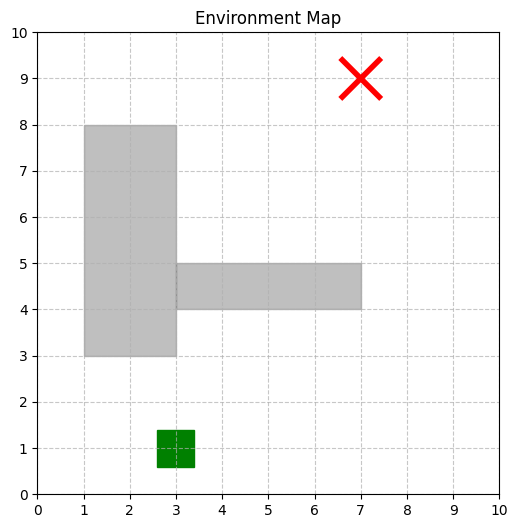

Map visualization saved to figures/default_map.png


In [3]:
visualize_map_only(MAIL_DELIVERY_MAPS["default"], 'figures/default_map.png')

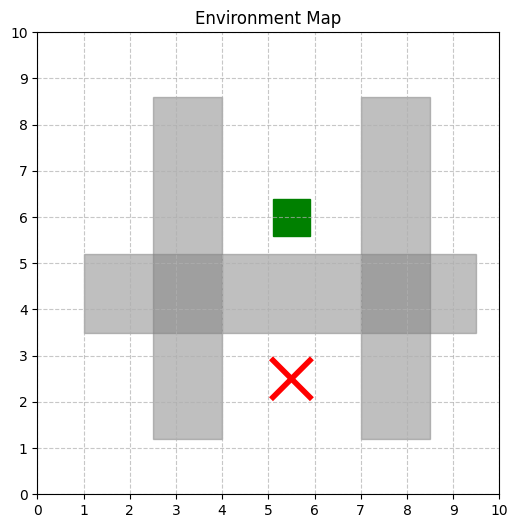

Map visualization saved to figures/inside_map.png


In [4]:
visualize_map_only(MAIL_DELIVERY_MAPS["inside"], 'figures/inside_map.png') #